

# Transferencia de calor en un dominio unidimensional.

## José Eduardo Lara Rodríguez
## Geofísica computacional
## Fecha: 2 de octubre de 2021




##Modelo Conceptual

Se va a estudiar la transferencia de calor en forma de conducción en una dimensión en un dominio.

La energía (trabajo, calor) se transfiere mediante interacciones de un sistema a otro por la diferencia de temperatura.

El calor es la forma de energía que se transfiere de un sistema a otro por la diferencia de temperatura.
  
  -**Conducción:** energía térmica se transfiere de un punto a otro por medio de la interacción entre los átomos o moléculas de la materia. La conducción no implica movimiento.
  
  -**Convección:** el calor se transfiere a través de un fluido en movimiento donde hay diferencia de temperatura.
 
  -**Radiación:** calor emitido en forma de ondas.

Se puede cuantificar los procesos de transferencia de calor en términos de ecuaciones de cambio (ecuaciones diferenciales) para estimar la energía transferida por unidad de tiempo.

Para este caso se va a estudiar la conducción de calor.
Vamos a hacer uso de la Ley de Fourier para conducción de calor donde la trsnferencia de calor depende de la conductividad térmica y del cambio de temperatura en una dirección.

Se va a analizar la transferenca de caor en una dimensión de una pared de un horno en una dirección x. El objetivo es conocer la distribución de temperaturas al interior de la pared del horno. Cómo varía el calor dentro del material.

Se va a trabajar con un dominio como el que se ilustra a continuación:

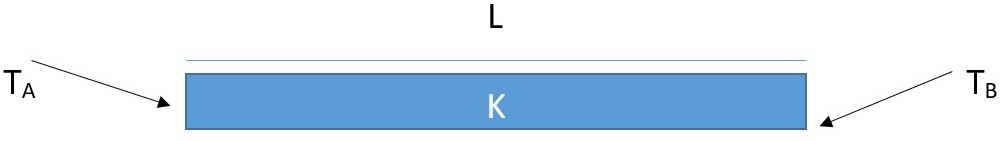

Considerando:
  - K como la capacidad térmica del material.
  - No hay flujo de calor en las paredes horizontales , son adiabáticas.
  - Como condiciones de frontera tenemos las temperaturas fijas en los extremos TA y TB.
  - No hay fuentes ni sumideros
  - Se desea calcular la temperatura T al interior del dominio.
  - Vamos a suponer que el dominio es unidimensional como primera aproximación.
  - Se va a tomar en cuenta la ley de transferencia de calor de Fourier.




##Modelo Matemático

Se tiene la **Ecuación general de Calor:**
$$
C_p \rho \frac{\partial T}{\partial t} + C_p \rho \frac{\partial T}{\partial x_i}(u_jT) - \frac{\partial }{\partial x_j}(\kappa\frac{\partial T}{\partial x_j})=S  
$$
Donde el primer término
$$
C_p \rho \frac{\partial T}{\partial t} 
$$
representa la parte temporal, T cambia con el tiempo.

Segundo término 
$$
C_p \rho \frac{\partial T}{\partial x_i}(u_jT)
$$
Tiene que ver con la convección, hay movimiento donde u es la velocidad del movimiento.

Tercer término
$$
\frac{\partial }{\partial x_j}(\kappa\frac{\partial T}{\partial x_j})
$$
Proviene de la Ley de Transferencia de calor de Fourier (término de conducción).
________________________________________________________________________________

**Parámetros Físicos**

Cp: Capacidad calorífica [J/Kg °K]

rho: Densidad [Kg/m^3]

k: Conductividad térmica.

S: Fuente o sumidero [J/m^3s]

alpha = k/cp(rho) : Difusividad térmica [m^2/s]

**Variables independientes** (Podemos darles el valor que queramos)

x_j : Coordenadas cartesianas (x,y,z). [m]

t: Tiempo [s]

**Variables dependientes.**

T: Temperatura [°K]

u_j : Componentes de la velocidad (u_x, u_y, u_z). [m/s]
________________________________________________________________________________
Se estableció en el modelo Conceptual que nuestro interés se centra en la transferencia de calor en forma de conducción, no hay convección ni el término temporal, por o tanto:
$$
-\frac{\partial }{\partial x_j}(\kappa\frac{\partial T}{\partial x_j})=S
$$

**Finalmente el Modelo Matemático específico para este problema en una dimensión y con K constante queda:**
$$
-(\kappa\frac{d^2 T}{d x_j^2})=S
$$

Definiendo las condiciones de frontera
$$
T(x=0) = T_A    
$$
$$
T(x=L) = T_B
$$

De acuerdo con el modelo conceptual no hay fuentes ni sumideros
$$
S = 0
$$








##Modelo numérico.

Tenemos que discretizar el dominio. Es el primer paso en un modelo numérico cuyo objetivo es generar las contrapartes discretas de manera adecuada, para posteriormente evaluar numéricamente mediante algoritmos implementados en un ordenador.

Discreto: Que una magnitud toma valores distintos y separados.

Cuando hagamos una aproximación vamos a tener errores respecto a la función original.

Tenemos un dominio unidimensional.

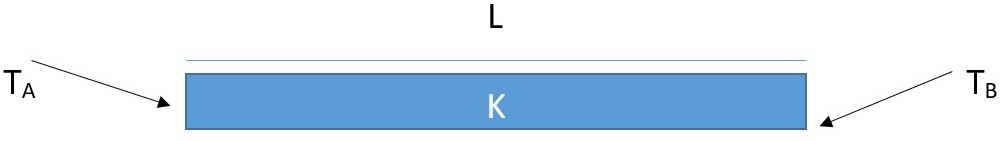

Se realiza una partición del dominio en varios subdominios del mismo tamaño para identificar los lugares del dominio donde se va a calcular la temperatura

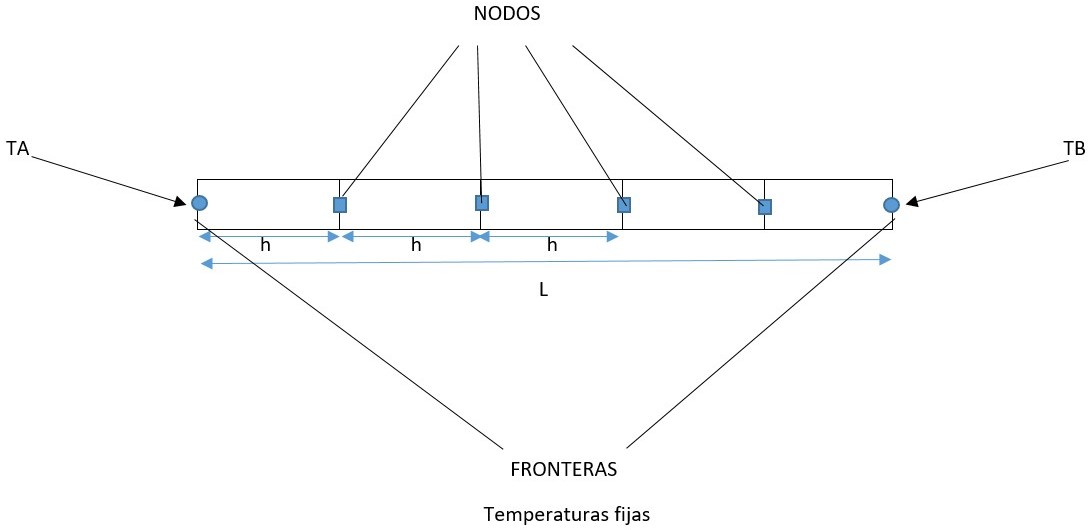

Vamos a calcular la T en los nodos que usaremos para interpolar valores en otras regiones del interior del dominio.

Se numeran los nodos, para este caso se tienen 6 nodos N=6

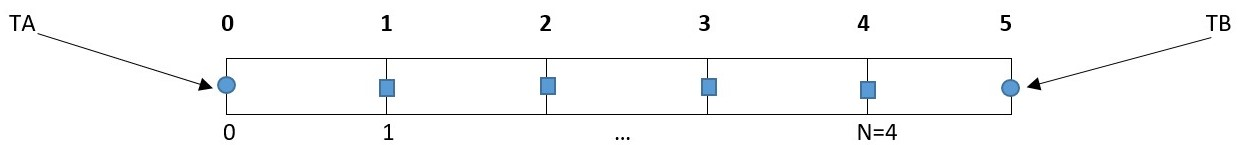

Debe tomarse en cuenta que:

  - La numeración comienza en cero
  - Los nodos donde se va a calcular la temperatura son del 1 a N=4. Hay que calcular 4 incognitas.
  - Las fornteras están identificadas con el índice i=0 e i=5 (N-1)
  - Se obtiene la malla del dominio que me define las coordenadas de los nodos.




##Discretización de las ecuaciones

Considere un nodo i de la malla, junto con sus vecinos i+1 e i-1

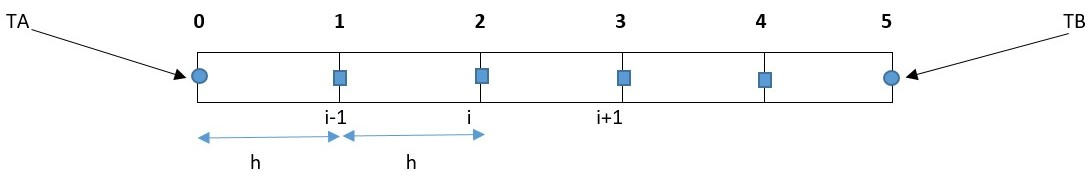

Todas las celdas tienen la misma h, separadas a la misma distancia

La aproximación de la derivada en el punto i es:
$$
\frac{d^2 T}{d^2 x} = \frac{T_{i+1} - 2 T_{i}
+ T_{i-1}}{ h^2} + O(h^2)
$$

Si sustituimos en el MM
$$
 -\kappa_{i}(\frac{T_{i+1} - 2 T_{i} + T_{i-1}}{ h^2})= S_{i}
$$
Primer modelo numérico discreto, representa la conducción de calor en el nodo i.
Se debe aproximar una ecuación para cada uno de los nodos.

La ecuación anterior representa la conducción de calor en el nodo i haciendo uso de i+1 e i-1.


Ahora definimos:

$$
r_{i} = (\frac{\kappa_{i}}{ h^2})
$$

reescribiendo la ecuación:
$$
-r_{i}T_{i-1} + 2r_{i}T_{i} -r_{i}T_{i+1}=S_{i}
$$
Necesitamos calcular la temperatura en los nodos i=1,2,3,4 que son los nodos internos.

Escribiendo una ecuación para cada nodo
$$
-r_{1}T_{0} + 2r_{1}T_{1} -r_{1}T_{2}=S_{1}
$$
$$
-r_{2}T_{1} + 2r_{2}T_{2} -r_{2}T_{3}=S_{2}
$$
$$
-r_{3}T_{2} + 2r_{3}T_{3} -r_{3}T_{4}=S_{3}
$$
$$
-r_{4}T_{3} + 2r_{4}T_{4} -r_{4}T_{5}=S_{4}
$$
Nos queda el sistema lineal que hay que resolver para obtener la temperatura en cada nodo.

Incorporando las condiciones de frontera
$$
T_{0}= T_{A}
$$
$$
T_{5}= T_{B}
$$
Se modifican los nodos i=1 e i=4
$$
2r_{1}T_{1} -r_{1}T_{2}=S_{1}+ r_{1}T_{A}
$$
$$
2r_{4}T_{4} -r_{4}T_{5}=S_{4} + r_{4}T_{B}
$$
El sistema de ecuaciones, con condiciones de frontera incluidas es:
$$
2r_{1}T_{1} -r_{1}T_{2}=S_{1}+ r_{1}T_{A}
$$
$$
-r_{2}T_{1} + 2r_{2}T_{2} -r_{2}T_{3}=S_{2}
$$
$$
-r_{3}T_{2} + 2r_{3}T_{3} -r_{3}T_{4}=S_{3}
$$
$$
2r_{4}T_{4} -r_{4}T_{5}=S_{4} + r_{4}T_{B}
$$
Su forma matricial queda:

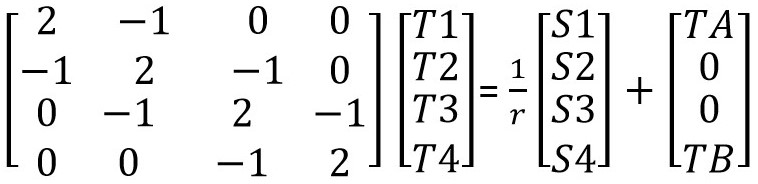










##Modelo Computacional

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          #'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [53]:

def buildMatrix (N):
    '''
    Función para construir la matriz
    '''
    #Matriz de ceros
    A = np.zeros((N,N))
    
    #Primer renglón
    A[0,0] = 2
    A[0,1] = -1
    #Renglones interiores
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    #Ultimo renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = 2
    
    return A

In [54]:
#Parámetros Físicos
L = 1.0
TA = 1
TB = 0
k = 1.0
S = 0
#Parámetros Numéricos
N = 10
h = L / (N +1)
r = k / h **2

[1.         0.90909091 0.81818182 0.72727273 0.63636364 0.54545455
 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909 0.        ]


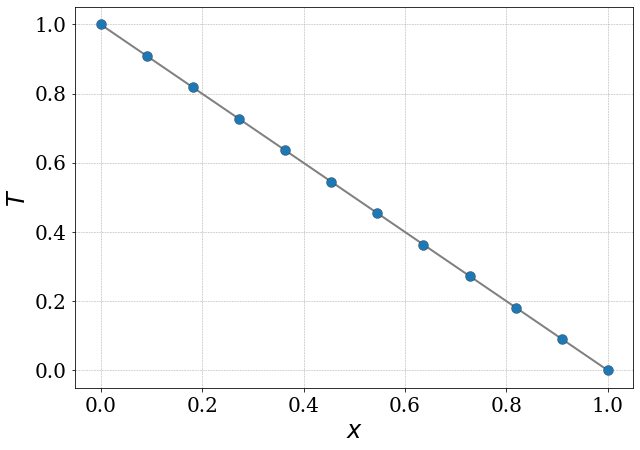

In [55]:
# Arreglo para almacenar la solución
T = np . zeros (N +2)
T [0] = TA # Frontera izquierda
T [ -1] = TB # Frontera derecha

# Lado derecho del sistema
b = np . zeros (N )
b [:] = S / r # Fuente o sumidero
b [0] += T [0] # Condición de frontera
b [ -1] += T [ -1] # Condición de frontera

# Construcción de la matriz
A = buildMatrix (N)

#Solución del sistema lineal
T[1:N+1] = np.linalg.solve(A,b)

# Impresión y graficación de la solución
print(T)
x = np.linspace (0 , L , N +2)
plt.figure( figsize =(10 ,7))
plt.plot(x,T,c='grey',lw =2.0)
plt.scatter(x,T,edgecolor='k',zorder = 10)
plt.xlabel ( '$x$')
plt.ylabel ( '$T$')
plt.grid ()
plt.show ()

Con S diferente de cero la función ya no es lineal, se muestra una curvatura (función cuadrática). Recordar que la S representa una fuente en caso de ser positivo y un sumidero en caso de ser negativo. Entre más alto sea el valor de S. habrá más puntos y la aproximación será mejor.

Si S es diferente de cero, es como si se pusiera a calentar toda la barra en todos sus nodos, excepto en las fronteras.

Se eleva la temperatura en la barra con las fronteras fijas, causando que la recta se curve. 

Si es lineal S=0, la temperatura dentro de la barra no va a superar las condiciones de frontera, va a estar acotada entre estos dos valores. 

In [56]:
#Cálculo de la solución exacta.
def solExact(x,TA,TB,k,L,S):
  '''
  Función que recibe los parámetros y calcula la función analítica
  '''
  return ((TB-TA)/L+(S/(2*k))*(L-x))*x+TA



In [57]:
def solNum (L , N , k , S , A , b , T , etiqueta):
  h = L / (N+1)
  r = k / h**2

  # Lado derecho del sistema
  b = np.zeros(N)
  b [:] = S / r # Fuente o sumidero
  b [0] += T [0] # Condici ´on de frontera
  b [ -1] += T [-1] # Condici ´on de frontera

  # Soluci ´on del sistema lineal
  T [1: N +1] = np.linalg.solve(A ,b)

  # Impresi ´on y graficaci ´on de la soluci ´on
  x = np.linspace(0 , L , N+2)

  # Construcci ´on de la etiqueta de cada gr´a fica
  if etiqueta == 'L':
    etiqueta = '$L$ = {:3.2f}'.format(L)
  elif etiqueta == 'k':
    etiqueta = '$\kappa$ = {:3.2f}'.format(k)
  elif etiqueta == 'S':
    etiqueta = '$S$ = {:3.2f}'.format(S)

  # Se grafican los puntos de la soluci ´on
  plt.scatter (x , T , edgecolor = 'k', s =50 , zorder = 10 , label=etiqueta)
  
def plotSol (title , filename ):
    plt.suptitle('Conducción estacionaria', fontsize = 24 , y = 0.94 , va = 'center_baseline')
    plt.title( title , fontsize =20 , color = 'blue')
    plt.ylabel( '$T$')
    plt.xlabel( '$x$')
    plt.legend( loc = 'center left', bbox_to_anchor =(1 , 0.5) , fontsize =12)
    plt.grid()
    plt.savefig( filename )
    plt.show()


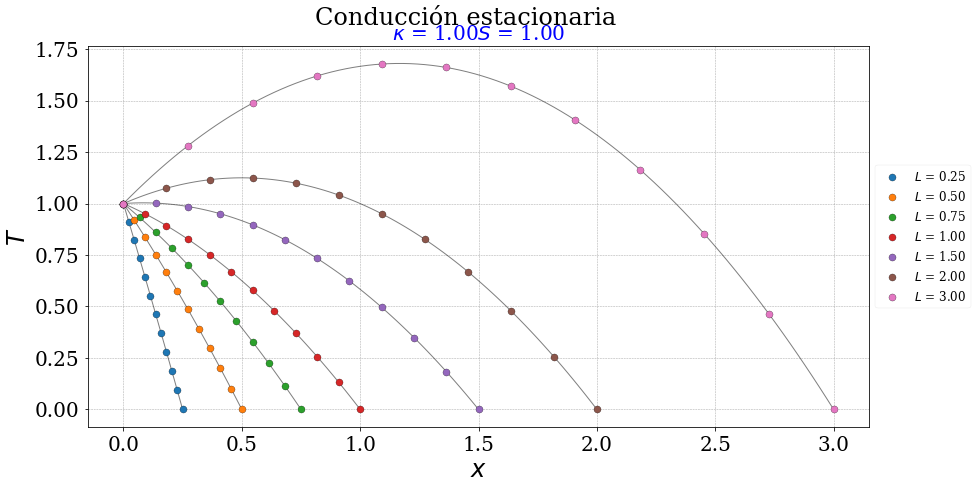

In [58]:
# Par´a metros f´ı sicos
l = [0.25 , 0.5 , 0.75 , 1.0 , 1.5 , 2.0 , 3.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

# Par´a metros num ´e ricos
N = 10

# Arreglo para almacenar la soluci ´on
T = np . zeros (N +2)
T [0] = TA # Frontera izquierda
T [-1] = TB # Frontera derecha

# Construcci ´on de la matriz
A = buildMatrix (N)


for L in l:
    solNum(L , N , k , S , A , b , T , 'L')
    xe = np.linspace (0 ,L ,100)
    plt.plot (xe ,
              solExact ( xe , TA , TB , k , L , S),
              'k-', lw =1.0 , alpha =0.5)
plotSol('$\kappa$ = {:3.2f}'.format(k) +'$S$ = {:3.2f}'.format(S),'nombre_archivo.pdf')


Con S=0 todo es lineal, aunque cambie la longitud se mantiene lineal.

Con k=1 y S=1, variando L. La fuente es la misma S=1, conforme la longitu se va haciendo más grande la curvatura aumenta. Hasta la solución L=1 las temperaturas no superan la TA

A partir de la longitud L=1.5, la temperatura comienza a superar la TA.


Inciso 4.A
L = 1.0, S = 1.0 y κ = [0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10].
Reproduce la siguiente gráfica:


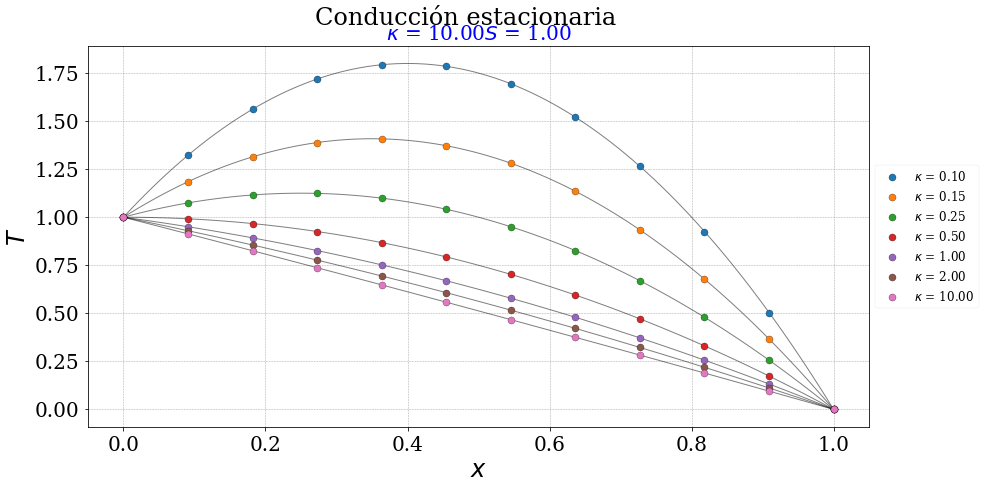

In [59]:
def solNum (L , N , k , S , A , b , T , etiqueta):
  h = L / (N+1)
  r = k / h**2

  # Lado derecho del sistema
  b = np.zeros(N)
  b [:] = S / r # Fuente o sumidero
  b [0] += T [0] # Condici ´on de frontera
  b [ -1] += T [-1] # Condici ´on de frontera

  # Soluci ´on del sistema lineal
  T [1: N +1] = np.linalg.solve(A ,b)

  # Impresi ´on y graficaci ´on de la soluci ´on
  x = np.linspace(0 , L , N+2)

  # Construcci ´on de la etiqueta de cada gr´a fica
  if etiqueta == 'L':
    etiqueta = '$L$ = {:3.2f}'.format(L)
  elif etiqueta == 'k':
    etiqueta = '$\kappa$ = {:3.2f}'.format(k)
  elif etiqueta == 'S':
    etiqueta = '$S$ = {:3.2f}'.format(S)

  # Se grafican los puntos de la soluci ´on
  plt.scatter (x , T , edgecolor = 'k', s =50 , zorder = 10 , label=etiqueta)
  
def plotSol (title , filename ):
    plt.suptitle('Conducción estacionaria', fontsize = 24 , y = 0.94 , va = 'center_baseline')
    plt.title( title , fontsize =20 , color = 'blue')
    plt.ylabel( '$T$')
    plt.xlabel( '$x$')
    plt.legend( loc = 'center left', bbox_to_anchor =(1 , 0.5) , fontsize =12)
    plt.grid()
    plt.savefig( filename )
    plt.show()

# Par´a metros f´ı sicos
L=1.0
TA = 1.0
TB = 0.0
ka = [0.1, 0.15, 0.25 , 0.5 , 1.0 , 2.0 , 10]
S = 1.0

# Par´a metros num ´e ricos
N = 10

# Arreglo para almacenar la soluci ´on
T = np . zeros (N +2)
T [0] = TA # Frontera izquierda
T [-1] = TB # Frontera derecha

# Construcci ´on de la matriz
A = buildMatrix (N)


for k in ka:
    solNum(L , N , k , S , A , b , T , 'k')
    xe = np.linspace (0 ,L ,100)
    plt.plot (xe ,
              solExact ( xe , TA , TB , k , L , S),
              'k-', lw =1.0 , alpha =0.5)
plotSol('$\kappa$ = {:3.2f}'.format(k) +'$S$ = {:3.2f}'.format(S),'nombre_archivo.pdf')



Inciso 4.B
L = 1.0, κ = 1.0 y S = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0].

Reproduce la gráfica.

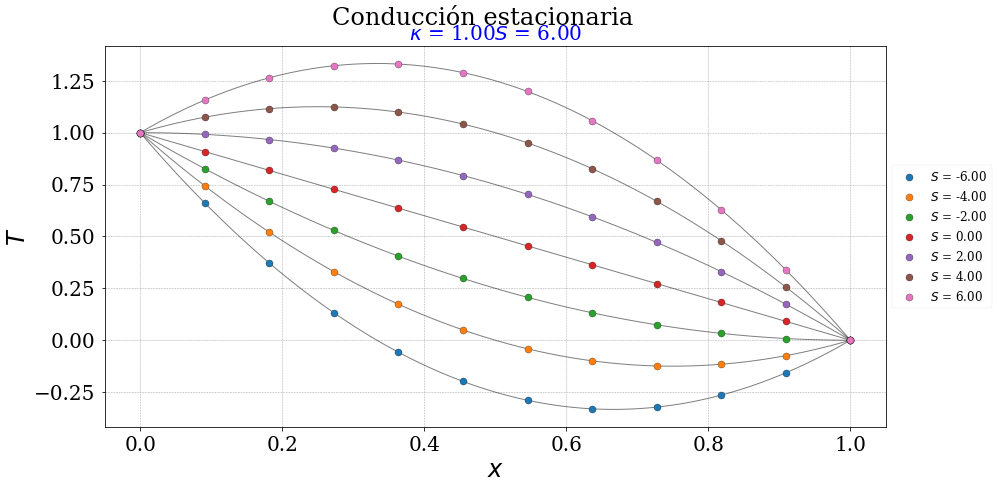

In [60]:
def plotSol (title , filename ):
    plt.suptitle('Conducción estacionaria', fontsize = 24 , y = 0.94 , va = 'center_baseline')
    plt.title( title , fontsize =20 , color = 'blue')
    plt.ylabel( '$T$')
    plt.xlabel( '$x$')
    plt.legend( loc = 'center left', bbox_to_anchor =(1 , 0.5) , fontsize =12)
    plt.grid()
    plt.savefig( filename )
    plt.show()

# Par´a metros f´ı sicos
L=1.0
TA = 1.0
TB = 0.0
k = 1.0
Sa = [-6.0, -4.0, -2.0 , 0.0 , 2.0 , 4.0 , 6.0]

# Par´a metros num ´e ricos
N = 10

# Arreglo para almacenar la soluci ´on
T = np . zeros (N +2)
T [0] = TA # Frontera izquierda
T [-1] = TB # Frontera derecha

# Construcci ´on de la matriz
A = buildMatrix (N)


for S in Sa:
    solNum(L , N , k , S , A , b , T , 'S')
    xe = np.linspace (0 ,L ,100)
    plt.plot (xe ,
              solExact ( xe , TA , TB , k , L , S),
              'k-', lw =1.0 , alpha =0.5)
plotSol('$\kappa$ = {:3.2f}'.format(k) +'$S$ = {:3.2f}'.format(S),'nombre_archivo.pdf')